In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

In [19]:
df = pd.read_csv('train.csv')
imgs = []
img_labels = []

for img_id, labels in zip(df.image_id.values, df.labels.values):
    # can fai
    try:
        img = Image.open(os.path.join('images', img_id))
        img.load()
        imgs.append(img)

        label_int = list(map(int, labels.replace('l', '').split(' ')))
        labels = np.zeros(92)
        labels[label_int] = 1.0

        img_labels.append(labels)
    except FileNotFoundError:
        print(img_id, 'doesnt exist')
   

img286.jpg doesnt exist
img172.jpg doesnt exist
img244.jpg doesnt exist
img287.jpg doesnt exist


In [20]:
label_name = []
with open('labels.csv' , 'r') as f:
    f.readline()
    for line in f:
        label_name.append(line.strip().split(',')[1])

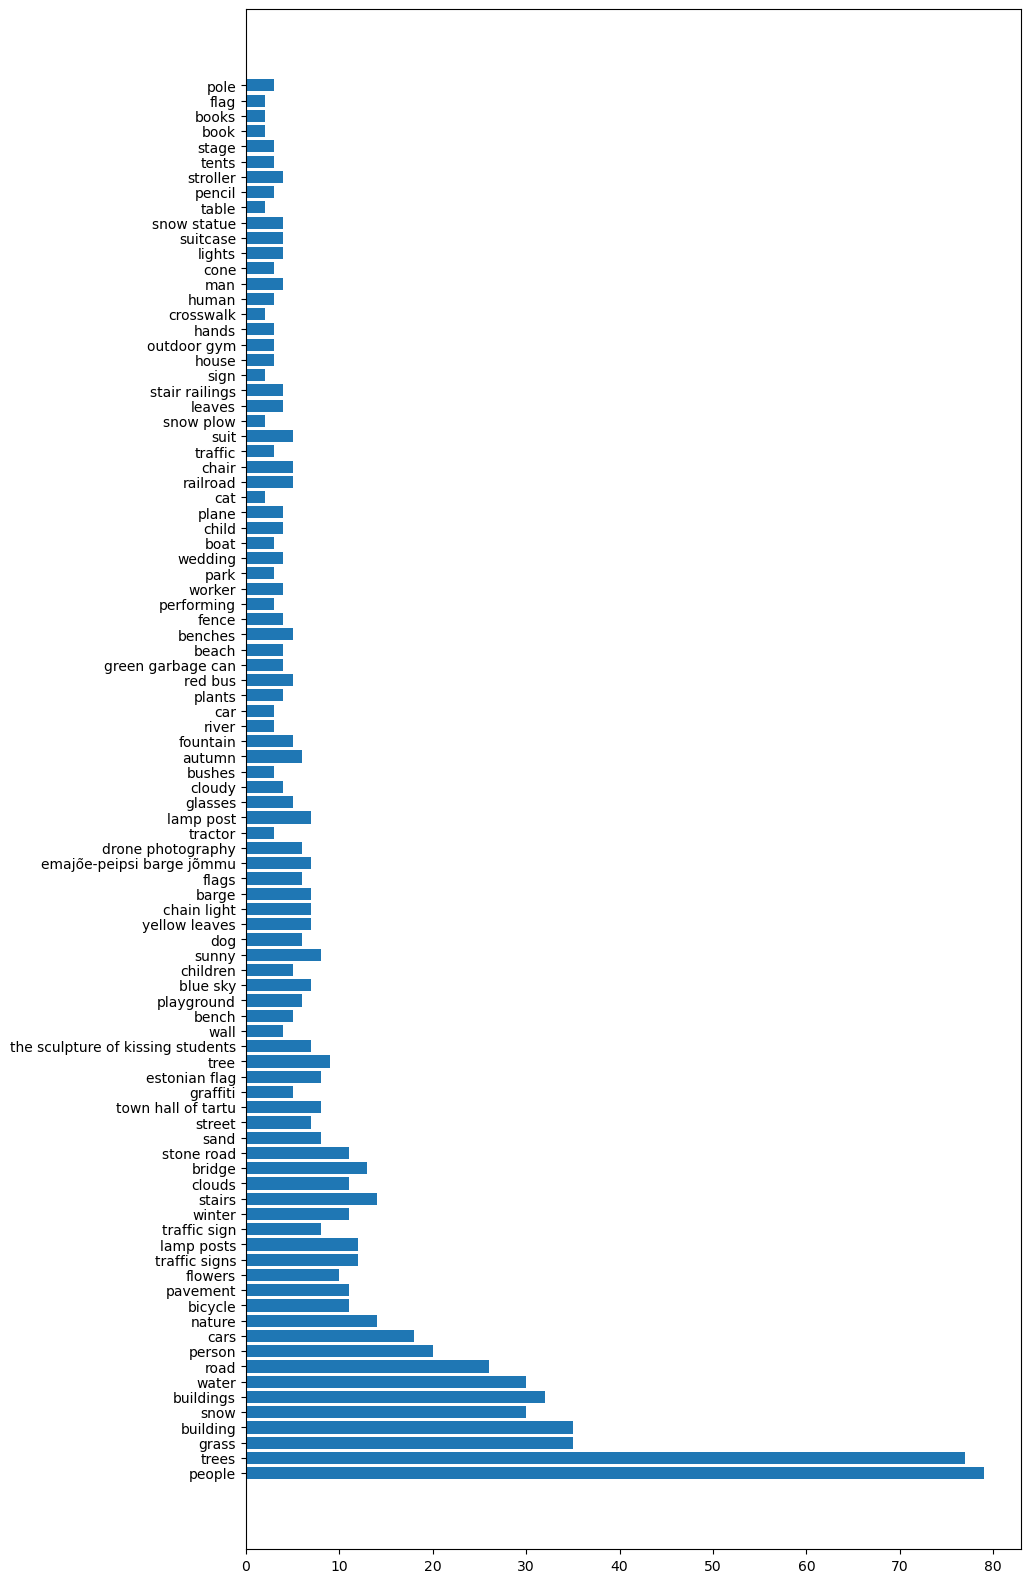

In [23]:
labels = np.concatenate([l.reshape(1,-1) for l in img_labels], axis=0)

plt.gcf().set_size_inches(10,20)
plt.barh(np.arange(92), labels.sum(axis=0))
plt.yticks(np.arange(92), label_name);

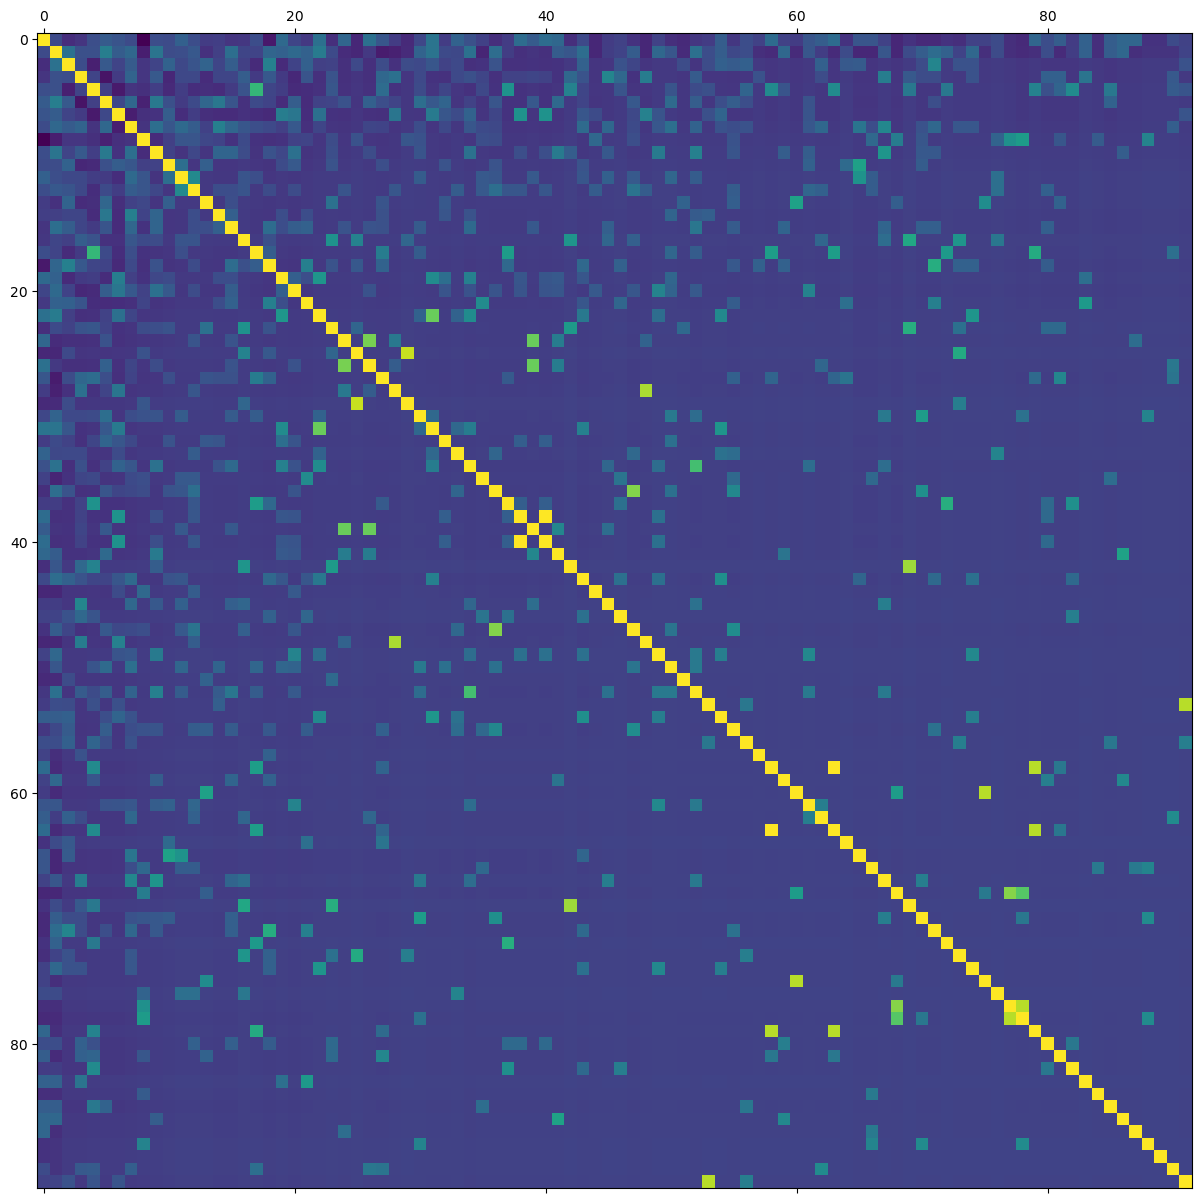

In [29]:
corr = np.corrcoef(labels, rowvar=False)
fig, ax = plt.subplots(1,1)
fig.set_size_inches(15,15)
ax.matshow(corr)

In [52]:
from itertools import product

print(len(label_name))
label_name_mat = np.array(list(product(label_name, label_name))).reshape(92,92,2)
np.unique(np.sort(label_name_mat[(corr > 0.5) & (corr < 0.99)], axis=1), axis=0)

92


array([['autumn', 'yellow leaves'],
       ['chain light', 'sign'],
       ['cone', 'plane'],
       ['cone', 'winter'],
       ['cone', 'worker'],
       ['estonian flag', 'flags'],
       ['estonian flag', 'town hall of tartu'],
       ['flags', 'town hall of tartu'],
       ['fountain', 'the sculpture of kissing students'],
       ['graffiti', 'house'],
       ['graffiti', 'wall'],
       ['green garbage can', 'pole'],
       ['hands', 'wedding'],
       ['human', 'man'],
       ['human', 'suit'],
       ['man', 'suit'],
       ['playground', 'sand'],
       ['red bus', 'sunny'],
       ['snow', 'winter'],
       ['snow plow', 'street'],
       ['snow plow', 'tractor'],
       ['stair railings', 'stairs']], dtype='<U33')